In [ ]:
!pip install kaggle

In [ ]:
kaggle = "/content/kaggle.json"

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.41GB/s]


In [ ]:
from zipfile import ZipFile
import os

file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name, 'r') as zip:
    zip.extractall(extract_folder)
    print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Library untuk pengolahan citra
import os
from sklearn.model_selection import train_test_split

# List untuk menyimpan data gambar (X) dan label (y)
X = []
y = []

# Folder path utama
dataset_path = '/content/dataset'

# Loop untuk setiap folder angka 0-9
print("Sedang memproses gambar...")
for label in range(10):
    folder_path = os.path.join(dataset_path, str(label))

    file_names = os.listdir(folder_path)

    for file_name in file_names:

        img_path = os.path.join(folder_path, file_name)
        img = cv2.imread(img_path)
        if img is None:
            continue


        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # 3. Resize gambar ke ukuran tetap (misal 28x28 pixel seperti MNIST standar)
        img = cv2.resize(img, (28, 28))

        # 4. Masukkan ke list
        X.append(img)
        y.append(label)

print(f"Selesai! Total gambar yang berhasil diproses: {len(X)}")

# Konversi list ke NumPy Array agar bisa diproses Neural Network
X = np.array(X)
y = np.array(y)

print(f"Shape Data X: {X.shape}")
print(f"Shape Data y: {y.shape}")

Sedang memproses gambar...
Selesai! Total gambar yang berhasil diproses: 21555
Shape Data X: (21555, 28, 28)
Shape Data y: (21555,)


In [ ]:
# Normalisasi nilai pixel dari 0-255 menjadi 0-1
X = X.astype('float32') / 255.0

# Split data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data siap!")
print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

Data siap!
Jumlah Data Latih: 17244
Jumlah Data Uji: 4311


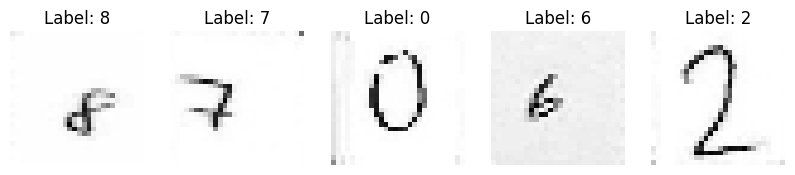

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    # Input Layer: Ubah gambar 28x28 menjadi vektor datar (784 pixel)
    Flatten(input_shape=(28, 28)),

    # Hidden Layer 1
    Dense(128, activation='relu'),
    Dropout(0.2), # Mencegah overfitting

    # Hidden Layer 2
    Dense(64, activation='relu'),

    # Output Layer: 10 Neuron (karena ada 10 angka: 0-9) dengan Softmax
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Setup Early Stopping (berhenti jika tidak ada perbaikan)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Mulai Training
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2, # Ambil 20% dari data latih untuk validasi
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1016 - loss: 2.3557 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1119 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3035
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0985 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3037
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1084 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3037
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1069 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3039
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1067 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1096 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1070 - loss: 2.3021 - val_accuracy: 0.

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0906 - loss: 2.3036

Akurasi pada Data Test: 9.09%


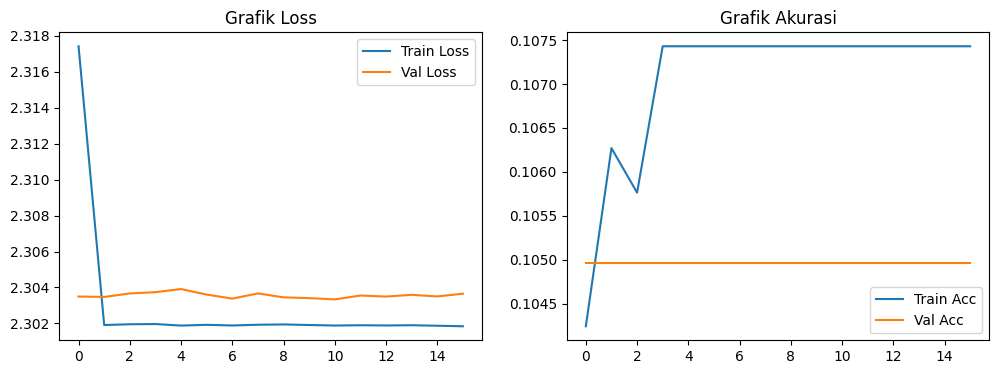

In [ ]:
# Evaluasi Model pada Data Test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nAkurasi pada Data Test: {test_acc:.2%}")

# Plot Grafik Loss dan Akurasi
plt.figure(figsize=(12, 4))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Grafik Loss')
plt.legend()

# Grafik Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Grafik Akurasi')
plt.legend()

plt.show()